<b>Name:</b> Neelanjan Dutta <br><b>
<b>Register number:</b> 2448040

## **LAB 8 - LSTM**

**Program #1:** NLP Sequence Prediction using LSTM

An online customer support company wants to build a chat reply suggestion
system to help its agents respond faster. The system should take a sequence
of customer words (ex:I am not able to) and predict the next likely word
(ex:login). This will help agents complete sentences faster and improve
response time.
You are required to implement an LSTM-based text prediction model using
TensorFlow Keras that can predict the next word in a given text
sequence.Use any Publicly available Dataset.

**WORKFLOW: (Next Word Prediction on SMS Spam Dataset using LSTM)**

**1. Kaggle Authentication and Dataset Download**

* Imported required libraries: `pandas`, `numpy`, `tensorflow`, `matplotlib`.
* Used `google.colab.files.upload()` to upload `kaggle.json` for authentication.
* Saved Kaggle credentials in `/root/.kaggle/kaggle.json` with correct permissions.
* Downloaded the dataset **"SMS Spam Collection Dataset"** from Kaggle and extracted it to `/content`.

**2. Data Loading and Basic Cleaning**

* Loaded the dataset (`spam.csv`) using `pd.read_csv()` with `latin-1` encoding.
* Selected only the message text column (`v2`) and renamed it to `text`.
* Converted all text to lowercase and removed empty or whitespace-only entries.
* Printed total number of non-empty messages.

**3. Tokenization and Sequence Preparation**

* Created a `Tokenizer()` object and fit it on the entire SMS text corpus.
* Calculated `total_words` = vocabulary size + 1.
* Generated **n-gram sequences** for each message:

  * For every tokenized message, created sequences of length 2 up to the full message length.
* Found `max_seq_len` (length of longest sequence).
* Applied `pad_sequences()` to make all sequences equal length (pre-padding).
* Split into:

  * `X` → all words except last
  * `y` → last word in the sequence (one-hot encoded).

**4. LSTM Model Building**

* Built a Sequential model:

  * **Embedding layer**: (input\_dim=total\_words, output\_dim=50)
  * **LSTM layer**: 100 units
  * **Dense output layer**: `softmax` activation, size = vocabulary size
* Compiled with:

  * Loss: `categorical_crossentropy`
  * Optimizer: `adam`
  * Metric: `accuracy`

**5. Model Training**

* Trained for 50 epochs with:

  * `validation_split=0.2` (20% of data used for validation)
  * Verbose output enabled
* Captured training history for accuracy and loss.

**6. Accuracy & Loss Visualization**

* Plotted **Training vs Validation Accuracy** over epochs.
* Plotted **Training vs Validation Loss** over epochs.
* Used `matplotlib` with clear labels, legends, and grid lines.

**7. Next Word Prediction Function**

* Defined `predict_next_word(seed_text, next_words)` to:

  * Tokenize and pad input text
  * Predict the next word using the trained model
  * Append predicted word to seed text and repeat for the specified number of words.

**8. Model Testing on Sample Inputs**

* Tested the model on predefined sentences:

  * `"i am not able"`
  * `"please help me"`
  * `"how can i"`
  * `"i cannot login"`
  * `"my account is"`
* Printed the input sentence and the predicted next word.



In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import matplotlib.pyplot as plt

In [ ]:
# Kaggle authentication
from google.colab import files
import os

print("Please upload your kaggle.json file...")
uploaded = files.upload()

uploaded_filename = list(uploaded.keys())[0]
os.makedirs("/root/.kaggle", exist_ok=True)
with open("/root/.kaggle/kaggle.json", "wb") as f:
    f.write(uploaded[uploaded_filename])
os.chmod("/root/.kaggle/kaggle.json", 600)
print("Kaggle credentials saved successfully!")

# ------------------------------
# 1. Download dataset from Kaggle
# ------------------------------
!kaggle datasets download -d uciml/sms-spam-collection-dataset -p /content
!unzip -o /content/sms-spam-collection-dataset.zip -d /content

Please upload your kaggle.json file...


Saving kaggle.json to kaggle (5).json
Kaggle credentials saved successfully!
Dataset URL: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset
License(s): unknown
sms-spam-collection-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  /content/sms-spam-collection-dataset.zip
  inflating: /content/spam.csv       


In [ ]:
# Load and preprocess data
df = pd.read_csv("/content/spam.csv", encoding='latin-1')
df = df[['v2']]  # v2 = message text
df.rename(columns={'v2': 'text'}, inplace=True)

# Lowercase & remove empty entries
df['text'] = df['text'].astype(str).str.lower()
df = df[df['text'].str.strip() != '']

print(f"Total messages: {len(df)}")

Total messages: 5572


In [ ]:
# Tokenization & sequence creation

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['text'])
total_words = len(tokenizer.word_index) + 1
print(f"Total unique words: {total_words}")

input_sequences = []
for line in df['text']:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_seq = token_list[:i+1]
        input_sequences.append(n_gram_seq)

max_seq_len = max(len(seq) for seq in input_sequences)
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_seq_len, padding='pre'))

X = input_sequences[:, :-1]
y = input_sequences[:, -1]
y = tf.keras.utils.to_categorical(y, num_classes=total_words)

print(f"Shape of X: {X.shape}, Shape of y: {y.shape}")


Total unique words: 8921
Shape of X: (82439, 188), Shape of y: (82439, 8921)


In [ ]:
# Build lightweight LSTM model

model = Sequential()
model.add(Embedding(total_words, 50))
model.add(LSTM(100))
model.add(Dense(total_words, activation='softmax'))

model.build(input_shape=(None, max_seq_len-1))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 188, 50)        │       446,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 100)            │        60,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8921)           │       901,021 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,407,471 (5.37 MB)

 Trainable params: 1,407,471 (5.37 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train model with validation split

history = model.fit(
    X, y,
    epochs=50,
    verbose=1,
    validation_split=0.2  # 20% validation set
)

Epoch 1/50
2061/2061 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - accuracy: 0.0268 - loss: 7.3439 - val_accuracy: 0.0344 - val_loss: 6.9239
Epoch 2/50
2061/2061 ━━━━━━━━━━━━━━━━━━━━ 34s 16ms/step - accuracy: 0.0471 - loss: 6.5737 - val_accuracy: 0.0621 - val_loss: 6.6557
Epoch 3/50
2061/2061 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.0718 - loss: 6.0617 - val_accuracy: 0.0796 - val_loss: 6.4922
Epoch 4/50
2061/2061 ━━━━━━━━━━━━━━━━━━━━ 43s 17ms/step - accuracy: 0.1004 - loss: 5.6372 - val_accuracy: 0.1023 - val_loss: 6.3754
Epoch 5/50
2061/2061 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.1351 - loss: 5.2205 - val_accuracy: 0.1198 - val_loss: 6.3310
Epoch 6/50
2061/2061 ━━━━━━━━━━━━━━━━━━━━ 39s 16ms/step - accuracy: 0.1690 - loss: 4.8476 - val_accuracy: 0.1333 - val_loss: 6.3300
Epoch 7/50
2061/2061 ━━━━━━━━━━━━━━━━━━━━ 43s 17ms/step - accuracy: 0.2010 - loss: 4.5154 - val_accuracy: 0.1480 - val_loss: 6.3187
Epoch 8/50
2061/2061 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.2352 -

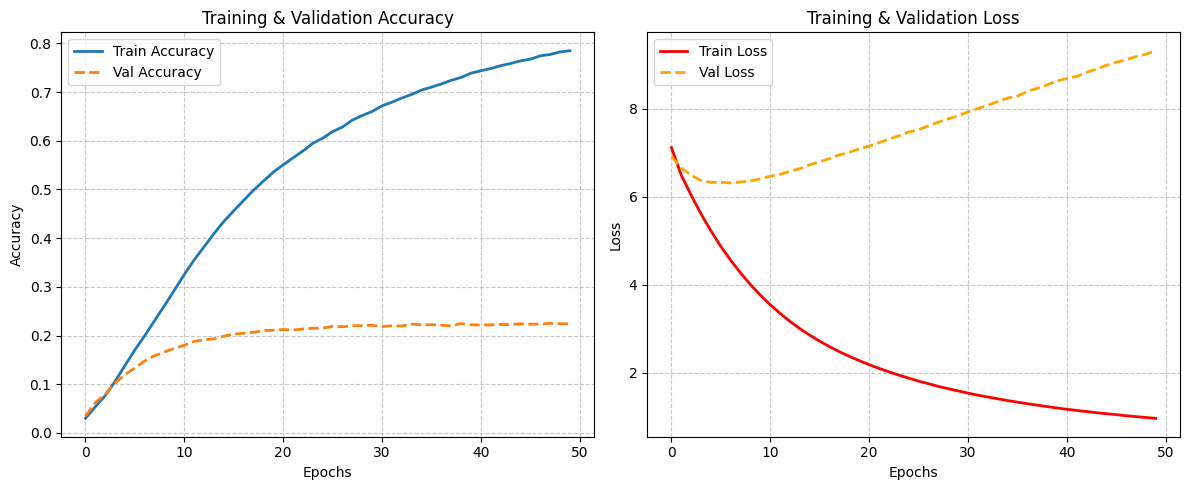

In [ ]:
# Plot Accuracy & Loss

plt.figure(figsize=(12, 5))

# --- Accuracy ---
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Val Accuracy', linewidth=2, linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# --- Loss ---
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='red', linewidth=2)
plt.plot(history.history['val_loss'], label='Val Loss', color='orange', linewidth=2, linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
# 7. Prediction function

def predict_next_word(seed_text, next_words):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')
        predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                seed_text += " " + word
                break
    return seed_text



In [ ]:
test_sentences = [
    "i am not able",
    "please help me",
    "how can i",
    "i cannot login",
    "my account is"
]

for sentence in test_sentences:
    print(f"Input: '{sentence}' -> Prediction: '{predict_next_word(sentence, 1)}'")


Input: 'i am not able' -> Prediction: 'i am not able to'
Input: 'please help me' -> Prediction: 'please help me from'
Input: 'how can i' -> Prediction: 'how can i think'
Input: 'i cannot login' -> Prediction: 'i cannot login you'
Input: 'my account is' -> Prediction: 'my account is not'


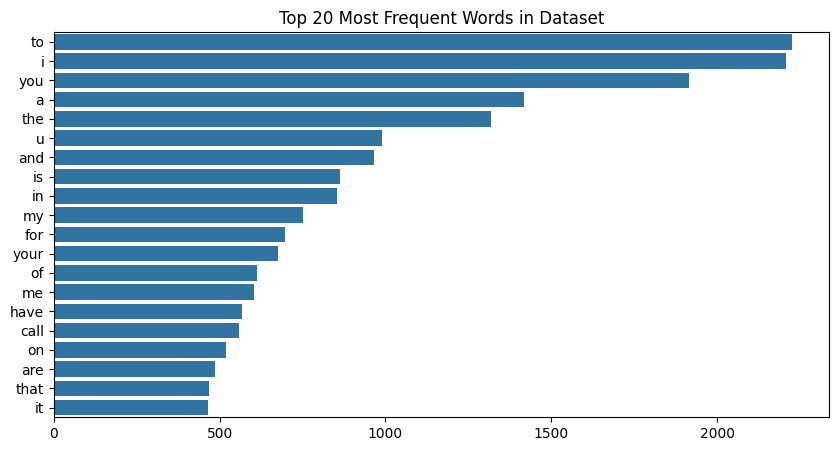

In [ ]:
from collections import Counter
import seaborn as sns

all_words = " ".join(df['text']).split()
word_counts = Counter(all_words)
top_words = word_counts.most_common(20)

words, counts = zip(*top_words)
plt.figure(figsize=(10,5))
sns.barplot(x=list(counts), y=list(words))
plt.title("Top 20 Most Frequent Words in Dataset")
plt.show()


**Program #2:** Predicting Hit Songs using LSTM
A music streaming company wants to predict whether a newly released song will
become a hit based on its first few weeks of streaming data. Early prediction helps
the marketing team decide which songs to promote heavily.
You are required to build an LSTM-based prediction model to forecast if a song will
reach Top 50 in the charts within the next month.

Use any music streaming dataset.Ex:Spotify Charts dataset from
Kaggle or a synthetic dataset you create.

In [ ]:
# Install Kaggle API
!pip install kaggle --quiet

# Upload your kaggle.json (from https://www.kaggle.com/account)
from google.colab import files
files.upload()

# Move it to ~/.kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle (8).json


In [ ]:
# Download Spotify Daily Top 200
!kaggle datasets download -d dhruvildave/spotify-charts

# Unzip
!unzip spotify-charts.zip -d spotify_data


Dataset URL: https://www.kaggle.com/datasets/dhruvildave/spotify-charts
License(s): ODbL-1.0
 96% 910M/945M [00:04<00:00, 243MB/s]
100% 945M/945M [00:04<00:00, 227MB/s]
Archive:  spotify-charts.zip
  inflating: spotify_data/charts.csv  


In [ ]:
import pandas as pd

df = pd.read_csv("spotify_data/charts.csv", nrows=5)
print(df.columns)
print(df.head())

Index(['title', 'rank', 'date', 'artist', 'url', 'region', 'chart', 'trend',
       'streams'],
      dtype='object')
                         title  rank        date  \
0      Chantaje (feat. Maluma)     1  2017-01-01   
1  Vente Pa' Ca (feat. Maluma)     2  2017-01-01   
2   Reggaetón Lento (Bailemos)     3  2017-01-01   
3                       Safari     4  2017-01-01   
4                  Shaky Shaky     5  2017-01-01   

                                  artist  \
0                                Shakira   
1                           Ricky Martin   
2                                   CNCO   
3  J Balvin, Pharrell Williams, BIA, Sky   
4                           Daddy Yankee   

                                                 url     region   chart  \
0  https://open.spotify.com/track/6mICuAdrwEjh6Y6...  Argentina  top200   
1  https://open.spotify.com/track/7DM4BPaS7uofFul...  Argentina  top200   
2  https://open.spotify.com/track/3AEZUABDXNtecAO...  Argentina  top200   
3  h

In [ ]:
import pandas as pd
import numpy as np
from datetime import timedelta
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


In [ ]:
# Load the data
print("Loading and preprocessing data...")
df = pd.read_csv("spotify_data/charts.csv")

# Keep only relevant columns
df = df[['title', 'date', 'rank', 'streams', 'artist']]

# Convert date and clean data
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.dropna(subset=['title', 'date', 'rank', 'streams'])
df['rank'] = df['rank'].astype(int)
df['streams'] = df['streams'].astype(int)

# Sort by title and date
df = df.sort_values(['title', 'date'])

print(f"Total records: {len(df)}")

Loading and preprocessing data...
Total records: 20321897


In [ ]:
# Create a proper temporal prediction setup
def create_hit_prediction_data(df, lookback_days=7, prediction_window=21):
    """
    Create data for predicting hits based on early performance

    Args:
    - lookback_days: Number of initial days to use as input features
    - prediction_window: Number of days ahead to check for hit status
    """

    songs_data = []

    for title, group in df.groupby('title'):
        group = group.sort_values('date').reset_index(drop=True)

        # Need at least lookback_days + prediction_window days of data
        if len(group) < lookback_days + prediction_window:
            continue

        # Extract features from first lookback_days
        early_streams = group['streams'].head(lookback_days).values
        early_ranks = group['rank'].head(lookback_days).values

        # Determine if song becomes a hit in the prediction window
        future_ranks = group['rank'].iloc[lookback_days:lookback_days+prediction_window]
        is_hit = (future_ranks <= 50).any()  # Hit if reaches top 50 in prediction window

        # Create additional features
        avg_early_streams = np.mean(early_streams)
        max_early_streams = np.max(early_streams)
        min_early_rank = np.min(early_ranks)
        stream_trend = np.polyfit(range(len(early_streams)), early_streams, 1)[0]  # Linear trend

        # Combine features
        features = np.concatenate([
            early_streams,  # Raw daily streams
            early_ranks,    # Raw daily ranks
            [avg_early_streams, max_early_streams, min_early_rank, stream_trend]  # Engineered features
        ])

        songs_data.append({
            'title': title,
            'artist': group['artist'].iloc[0],
            'features': features,
            'is_hit': int(is_hit),
            'early_streams': early_streams,
            'early_ranks': early_ranks
        })

    return songs_data

In [ ]:
# Create the prediction dataset
print("Creating temporal prediction dataset...")
songs_data = create_hit_prediction_data(df, lookback_days=7, prediction_window=21)
print(f"Songs with sufficient data: {len(songs_data)}")

# Convert to arrays
X = np.array([song['features'] for song in songs_data])
y = np.array([song['is_hit'] for song in songs_data])
titles = [song['title'] for song in songs_data]

print(f"Feature matrix shape: {X.shape}")
print(f"Target distribution - Hits: {np.sum(y)}, Non-hits: {len(y) - np.sum(y)}")
print(f"Hit rate: {np.mean(y)*100:.1f}%")

# Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Reshape for LSTM: we'll use a sequence of the engineered features
# For this example, we'll treat the daily streams and ranks as sequences
lookback_days = 7
sequence_features = 2  # streams and ranks for each day
static_features = 4    # engineered features

# Split the features
X_sequences = X_scaled[:, :lookback_days*sequence_features].reshape(-1, lookback_days, sequence_features)
X_static = X_scaled[:, lookback_days*sequence_features:]

print(f"Sequence features shape: {X_sequences.shape}")
print(f"Static features shape: {X_static.shape}")

# Train/test split
X_seq_train, X_seq_test, X_static_train, X_static_test, y_train, y_test = train_test_split(
    X_sequences, X_static, y, test_size=0.2, random_state=42, stratify=y
)

Creating temporal prediction dataset...
Songs with sufficient data: 34971
Feature matrix shape: (34971, 18)
Target distribution - Hits: 18549, Non-hits: 16422
Hit rate: 53.0%
Sequence features shape: (34971, 7, 2)
Static features shape: (34971, 4)


In [ ]:
# Build improved LSTM model
model = Sequential([
    LSTM(64, input_shape=(lookback_days, sequence_features), return_sequences=False),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("Model Summary:")
model.summary()

# Train the model
print("Training the model...")
history = model.fit(
    X_seq_train, y_train,
    validation_data=(X_seq_test, y_test),
    epochs=30,
    batch_size=32,
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model Summary:


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 64)             │        17,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,777 (77.25 KB)

 Trainable params: 19,777 (77.25 KB)

 Non-trainable params: 0 (0.00 B)

Training the model...
Epoch 1/30
875/875 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.7435 - loss: 0.5238 - val_accuracy: 0.7906 - val_loss: 0.4224
Epoch 2/30
875/875 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.7841 - loss: 0.4325 - val_accuracy: 0.8030 - val_loss: 0.4020
Epoch 3/30
875/875 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7958 - loss: 0.4149 - val_accuracy: 0.8243 - val_loss: 0.3816
Epoch 4/30
875/875 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.8148 - loss: 0.3907 - val_accuracy: 0.8356 - val_loss: 0.3657
Epoch 5/30
875/875 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8349 - loss: 0.3707 - val_accuracy: 0.8435 - val_loss: 0.3551
Epoch 6/30
875/875 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.8373 - loss: 0.3655 - val_accuracy: 0.8477 - val_loss: 0.3433
Epoch 7/30
875/875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8408 - loss: 0.3586 - val_accuracy: 0.8437 - val_loss: 0.3475
Epoch 8/30
875/875 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.8409 


Evaluating the model...
Training Accuracy: 86.80%
Test Accuracy: 86.72%

Classification Report:
              precision    recall  f1-score   support

     Non-Hit       0.83      0.90      0.86      3285
         Hit       0.90      0.84      0.87      3710

    accuracy                           0.87      6995
   macro avg       0.87      0.87      0.87      6995
weighted avg       0.87      0.87      0.87      6995


Confusion Matrix:
[[2945  340]
 [ 589 3121]]

Sample Predictions:
Song 5117: Prediction=0 (0.160), Actual=0, ✓
Song 3999: Prediction=0 (0.124), Actual=0, ✓
Song 3777: Prediction=0 (0.251), Actual=0, ✓
Song 1790: Prediction=1 (0.998), Actual=1, ✓
Song 2957: Prediction=1 (0.993), Actual=1, ✓
Song 5010: Prediction=1 (1.000), Actual=1, ✓
Song 6735: Prediction=0 (0.079), Actual=0, ✓
Song 5746: Prediction=1 (1.000), Actual=1, ✓
Song 5453: Prediction=1 (0.747), Actual=0, ✗
Song 4861: Prediction=0 (0.108), Actual=0, ✓


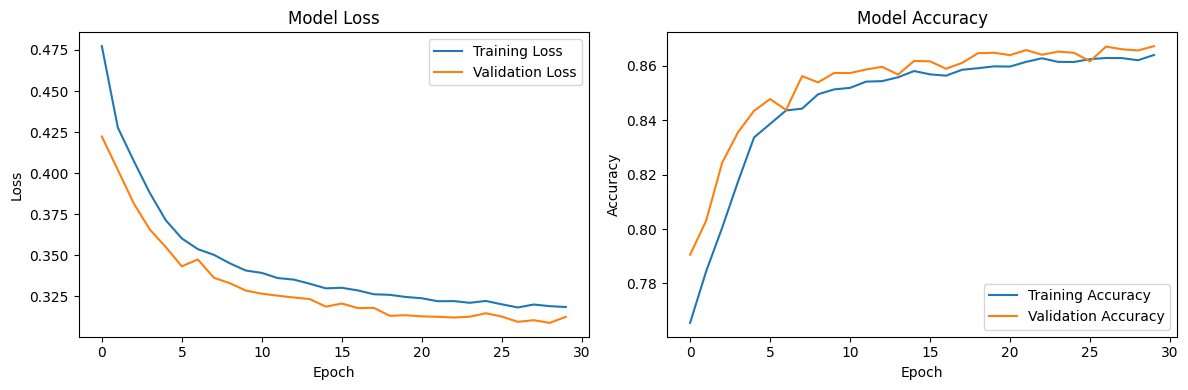


Analyzing prediction patterns...


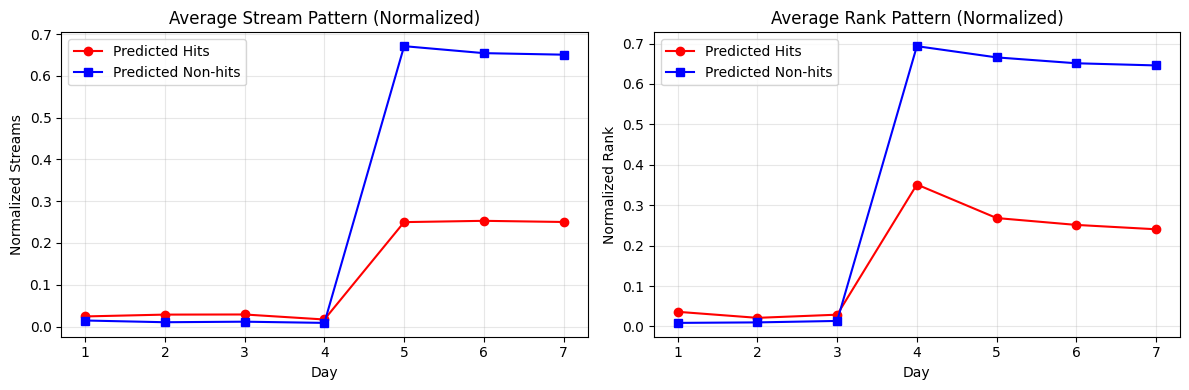


Model training completed!
Final test accuracy: 86.72%


In [ ]:
# Evaluate the model
print("\nEvaluating the model...")
train_loss, train_acc = model.evaluate(X_seq_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_seq_test, y_test, verbose=0)

print(f"Training Accuracy: {train_acc*100:.2f}%")
print(f"Test Accuracy: {test_acc*100:.2f}%")

# Make predictions
y_pred_proba = model.predict(X_seq_test, verbose=0)
y_pred = (y_pred_proba > 0.5).astype(int).flatten()

# Detailed evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Non-Hit', 'Hit']))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Show some prediction examples
print("\nSample Predictions:")
sample_indices = np.random.choice(len(y_test), 10, replace=False)

for i in sample_indices:
    original_idx = i  # This would need to be mapped back to original data
    prob = y_pred_proba[i][0]
    pred = y_pred[i]
    actual = y_test[i]

    print(f"Song {i+1}: Prediction={pred} ({prob:.3f}), Actual={actual}, " +
          f"{'✓' if pred == actual else '✗'}")

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Feature importance analysis (simplified)
print("\nAnalyzing prediction patterns...")

# Get predictions for all test data
hit_predictions = X_seq_test[y_pred == 1]
non_hit_predictions = X_seq_test[y_pred == 0]

if len(hit_predictions) > 0 and len(non_hit_predictions) > 0:
    # Analyze average patterns
    hit_avg_streams = np.mean(hit_predictions[:, :, 0], axis=0)  # streams over days
    non_hit_avg_streams = np.mean(non_hit_predictions[:, :, 0], axis=0)

    hit_avg_ranks = np.mean(hit_predictions[:, :, 1], axis=0)  # ranks over days
    non_hit_avg_ranks = np.mean(non_hit_predictions[:, :, 1], axis=0)

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(range(1, 8), hit_avg_streams, 'r-', label='Predicted Hits', marker='o')
    plt.plot(range(1, 8), non_hit_avg_streams, 'b-', label='Predicted Non-hits', marker='s')
    plt.title('Average Stream Pattern (Normalized)')
    plt.xlabel('Day')
    plt.ylabel('Normalized Streams')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 2, 2)
    plt.plot(range(1, 8), hit_avg_ranks, 'r-', label='Predicted Hits', marker='o')
    plt.plot(range(1, 8), non_hit_avg_ranks, 'b-', label='Predicted Non-hits', marker='s')
    plt.title('Average Rank Pattern (Normalized)')
    plt.xlabel('Day')
    plt.ylabel('Normalized Rank')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

print("\nModel training completed!")
print(f"Final test accuracy: {test_acc*100:.2f}%")

**WORKFLOW: (Hit Song Prediction using Spotify Daily Top 200 Data with LSTM)**

**1. Kaggle API Setup and Dataset Download**

* Installed `kaggle` package.
* Uploaded `kaggle.json` API key for authentication.
* Stored credentials in `~/.kaggle` with proper permissions.
* Downloaded dataset **"Spotify Daily Top 200"** from Kaggle.
* Extracted data into `spotify_data` folder.

**2. Data Loading and Preprocessing**

* Loaded `charts.csv` into a Pandas DataFrame.
* Selected relevant columns: `title`, `date`, `rank`, `streams`, `artist`.
* Converted `date` to datetime format and removed rows with missing values.
* Converted `rank` and `streams` to integers.
* Sorted the dataset by `title` and `date`.
* Printed total number of cleaned records.

**3. Temporal Prediction Dataset Creation**

* Defined `create_hit_prediction_data()` to prepare training samples:

  * **Lookback period**: First 7 days after a song appears → input features.
  * **Prediction window**: Next 21 days → determine if the song reaches **top 50**.
  * Computed raw features:

    * Daily streams for first 7 days
    * Daily ranks for first 7 days
  * Computed engineered features:

    * Average early streams
    * Max early streams
    * Minimum early rank
    * Linear trend of early streams
  * Assigned label `is_hit` (1 if hit, 0 otherwise).
* Returned list of dictionaries with features, labels, and metadata.

**4. Feature Matrix Preparation and Scaling**

* Converted features and labels to NumPy arrays:

  * `X` → combined raw + engineered features.
  * `y` → binary hit labels.
* Applied `MinMaxScaler` to normalize features.
* Reshaped first part of features into **sequence format** `(lookback_days, 2)` for LSTM (streams & ranks).
* Retained static engineered features separately.

**5. Train/Test Split**

* Used `train_test_split()` with `test_size=0.2` and stratified sampling on `y`.
* Created `X_seq_train`/`X_seq_test` for sequence input and corresponding `y_train`/`y_test`.

**6. LSTM Model Building**

* Built Sequential LSTM model:

  * LSTM(64) with `(lookback_days, sequence_features)` input shape.
  * Dropout(0.3)
  * Dense(32, relu) → Dropout(0.2) → Dense(16, relu)
  * Output Dense(1, sigmoid) for binary classification.
* Compiled with:

  * Loss: `binary_crossentropy`
  * Optimizer: `Adam(learning_rate=0.001)`
  * Metric: `accuracy`.

**7. Model Training**

* Trained for 30 epochs, batch size 32.
* Used `(X_seq_test, y_test)` for validation.

**8. Model Evaluation**

* Calculated training and test accuracy using `model.evaluate()`.
* Generated predictions (`y_pred_proba`, `y_pred`).
* Computed and displayed:

  * **Classification Report** (precision, recall, F1-score)
  * **Confusion Matrix**
* Displayed sample predictions with predicted probability, actual label, and correctness.

**9. Training History Visualization**

* Plotted **Training vs Validation Loss**.
* Plotted **Training vs Validation Accuracy**.

**10. Feature Importance & Pattern Analysis**

* Compared average **normalized daily streams** and **normalized daily ranks** between predicted hits and predicted non-hits.
* Plotted:

  * Average stream pattern (Days 1–7) for hits vs non-hits.
  * Average rank pattern (Days 1–7) for hits vs non-hits.

**11. Final Output**

* Reported final test accuracy.
* Declared model training complete.


